Question 17

Load Heart Disease datasets. What are the input features and target labels? Handle missing values. Scale numerical features using MinMaxScaler or StandardScaler if required. Split the dataset into training and testing sets (e.g., 80% training and 20% testing). Train three different models on the dataset (e.g., Logistic Regression, Decision Tree, and K-Nearest Neighbors). Evaluate the performance of each model on the test set. Use metrics such as accuracy, precision, recall, and F1-score. Experiment with both hard voting and soft voting. Evaluate the Voting Classifier on the test set. Compare its performance with individual models.

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df=pd.read_csv(r"C:\Users\SASWATA\OneDrive\Desktop\ML_PRAC\ML_PRAC\heart.csv")

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [44]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scale=MinMaxScaler()

In [50]:
y=df['target']
x=df.drop(['target'],axis=1)

In [52]:
x=scale.fit_transform(x)

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [56]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [60]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [70]:
l={'Linear Regression' : lr,'DecisionTreeClassifer':dt,'Knearest Neighbors':knn}
class_repo={}
acc_score={}
conf_matrix_res={}
for i in l:
    l[i].fit(x_train,y_train)
    y_pred=l[i].predict(x_test)
    acc_score[i]=accuracy_score(y_test,y_pred)
    class_repo[i]=classification_report(y_test,y_pred)
    conf_matrix_res[i]=list(confusion_matrix(y_test,y_pred))

In [82]:
for i in class_repo:
    print("Classification Report for {}".format(i))
    print(class_repo[i])
    print("------------------------------------------------------")

Classification Report for Linear Regression
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        31
           1       0.84      0.87      0.85        30

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

------------------------------------------------------
Classification Report for DecisionTreeClassifer
              precision    recall  f1-score   support

           0       0.74      0.65      0.69        31
           1       0.68      0.77      0.72        30

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.70        61

------------------------------------------------------
Classification Report for Knearest Neighbors
              precision    recall  f1-score   support

           0       0.93      0.84      0.88 

In [86]:
for i in acc_score:
    print("Accuracy Score for {}".format(i))
    print(acc_score[i])
    print("-------------------------------------")

Accuracy Score for Linear Regression
0.8524590163934426
-------------------------------------
Accuracy Score for DecisionTreeClassifer
0.7049180327868853
-------------------------------------
Accuracy Score for Knearest Neighbors
0.8852459016393442
-------------------------------------


<Axes: >

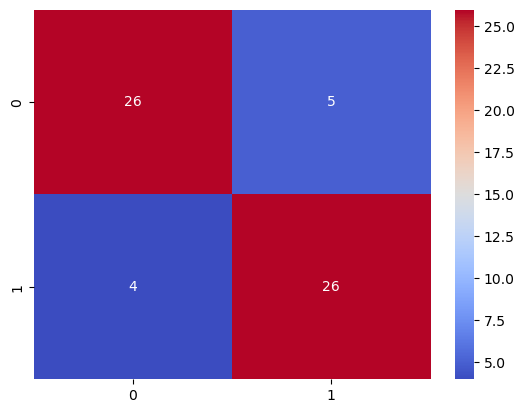

In [98]:
sns.heatmap(conf_matrix_res['Linear Regression'],annot=True,cmap="coolwarm")

<Axes: >

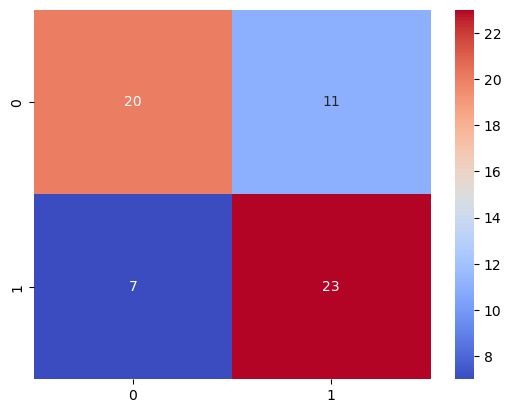

In [100]:
sns.heatmap(conf_matrix_res['DecisionTreeClassifer'],annot=True,cmap="coolwarm")

<Axes: >

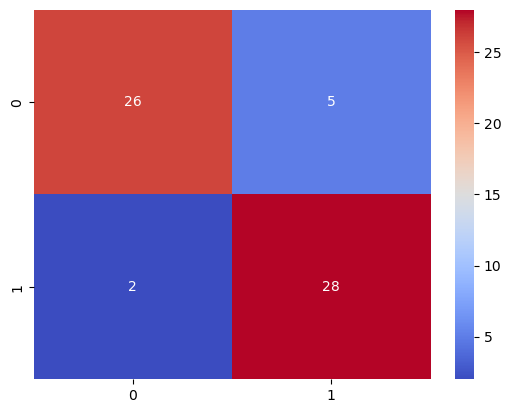

In [102]:
sns.heatmap(conf_matrix_res['Knearest Neighbors'],annot=True,cmap="coolwarm")

In [104]:
from sklearn.ensemble import VotingClassifier

In [108]:
hard_vote=VotingClassifier(estimators=[("lr",lr),("dt",dt),("knn",knn)],voting="hard")
hard_vote.fit(x_train,y_train)
y_pred_hard=hard_vote.predict(x_test)

In [110]:
soft_vote=VotingClassifier(estimators=[("lr",lr),("dt",dt),("knn",knn)],voting="soft")
soft_vote.fit(x_train,y_train)
y_pred_soft=hard_vote.predict(x_test)

In [114]:
print("For hard voting")
print(classification_report(y_test,y_pred_hard))
print("For soft voting")
print(classification_report(y_test,y_pred_soft))

For hard voting
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        31
           1       0.81      0.87      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

For soft voting
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        31
           1       0.81      0.87      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



<Axes: title={'center': 'For hard voting'}>

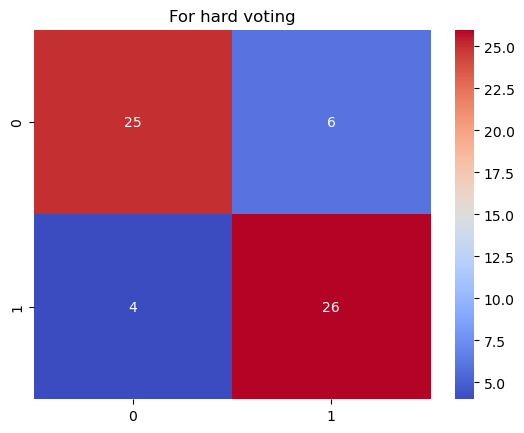

In [122]:
plt.title("For hard voting")
sns.heatmap(confusion_matrix(y_test,y_pred_hard),annot=True,cmap="coolwarm")

<Axes: title={'center': 'For soft voting'}>

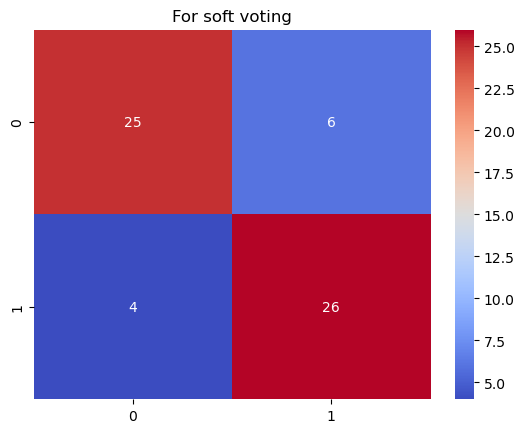

In [124]:
plt.title("For soft voting")
sns.heatmap(confusion_matrix(y_test,y_pred_hard),annot=True,cmap="coolwarm")